In [1]:
%matplotlib inline
from config_calc import *
import grid_tools

from collections import OrderedDict

import cesm_orcas_sci as cesm
import cam
import gv
import metpy.calc as mcalc

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [93]:
reload(cesm)
case = 'bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004'

tracer_def = cesm.trace_gas_tracers(case)
tracer_3d = [k for k in tracer_def]
varlist = ['CO2','U','V']

ds = cesm.open_casedata(case,'atm','cam.h0',varlist)
ds = ds.sel(time=slice('2016-01-15','2016-02-29')).isel(lev=-1)
ds = cesm.convert_dataset(ds,case)
print('ds size {:0.2f}GB\n'.format(ds.nbytes / 1e9))
ds.info()

ds size 0.03GB

xarray.Dataset {
dimensions:
	ilev = 57 ;
	lat = 192 ;
	lon = 288 ;
	nbnd = 2 ;
	slat = 191 ;
	slon = 288 ;
	time = 46 ;

variables:
	float32 CO2(time, lat, lon) ;
		CO2:units = ppmv ;
		CO2:long_name = CO2 ;
	float64 P0() ;
		P0:long_name = reference pressure ;
		P0:units = Pa ;
	float64 ch4vmr(time) ;
		ch4vmr:long_name = ch4 volume mixing ratio ;
	float64 co2vmr(time) ;
		co2vmr:long_name = co2 volume mixing ratio ;
	float64 f11vmr(time) ;
		f11vmr:long_name = f11 volume mixing ratio ;
	float64 f12vmr(time) ;
		f12vmr:long_name = f12 volume mixing ratio ;
	float64 gw(lat) ;
		gw:long_name = gauss weights ;
	float64 hyai(ilev) ;
		hyai:long_name = hybrid A coefficient at layer interfaces ;
	float64 hyam() ;
		hyam:long_name = hybrid A coefficient at layer midpoints ;
	float64 hybi(ilev) ;
		hybi:long_name = hybrid B coefficient at layer interfaces ;
	float64 hybm() ;
		hybm:long_name = hybrid B coefficient at layer midpoints ;
	float64 ilev(ilev) ;
		ilev:long_name = 

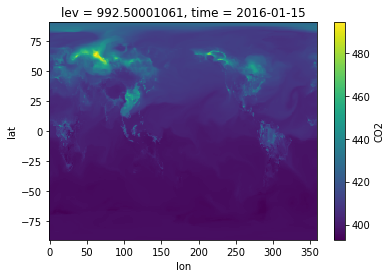

In [10]:
ds.CO2.plot()

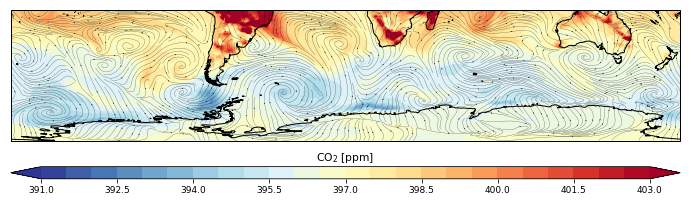

In [94]:
from cartopy.util import add_cyclic_point
import cmocean
import plot_tools
fig = plt.figure(figsize=(12,12))
crs_latlon = ccrs.PlateCarree()
ax = fig.add_subplot(111,projection=crs_latlon)
ax.set_extent([-180,180.,-85,-15],crs=crs_latlon)
ax.coastlines('50m')

dsi = ds.isel(time=0)
lat = dsi.lat.values
field,lon = add_cyclic_point(dsi.CO2.values,coord=dsi.lon.values)

cf = ax.contourf(lon,lat,field,levels=np.arange(391,403.5,0.5),
                 cmap = 'RdYlBu_r',
                 extend='both',
                 transform=ccrs.PlateCarree())

uvel,lonu = add_cyclic_point(dsi.U.values,coord=dsi.lon.values)
vvel,lonv = add_cyclic_point(dsi.V.values,coord=dsi.lon.values)

lonu = np.where(lonu>=180.,lonu-360.,lonu)

sp = ax.streamplot(lonu,lat,uvel,vvel,
                   linewidth=0.2,
                   arrowsize = 0.2,
                   density=5,
                   color='k',
                   transform=ccrs.PlateCarree())


cb = plt.colorbar(cf,orientation='horizontal',pad=0.04,aspect=50)
cb.ax.set_title('CO$_2$ [ppm]')

plt.savefig(os.path.join(diro['fig'],'co2-synoptic-var-illustration.pdf'),
            dpi=300,bbox_inches='tight')

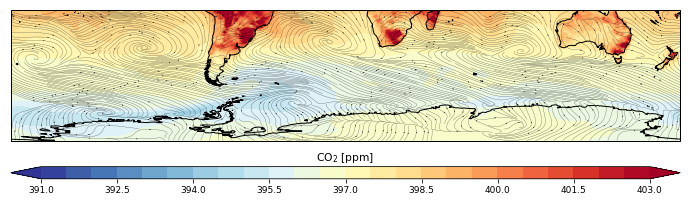

In [95]:
from cartopy.util import add_cyclic_point
import cmocean
import plot_tools
fig = plt.figure(figsize=(12,12))
crs_latlon = ccrs.PlateCarree()
ax = fig.add_subplot(111,projection=crs_latlon)
ax.set_extent([-180,180.,-85,-15],crs=crs_latlon)
ax.coastlines('50m')

dsi = ds.mean(dim='time')
lat = dsi.lat.values
field,lon = add_cyclic_point(dsi.CO2.values,coord=dsi.lon.values)

cf = ax.contourf(lon,lat,field,levels=np.arange(391,403.5,0.5),
                 cmap = 'RdYlBu_r',
                 extend='both',
                 transform=ccrs.PlateCarree())

uvel,lonu = add_cyclic_point(dsi.U.values,coord=dsi.lon.values)
vvel,lonv = add_cyclic_point(dsi.V.values,coord=dsi.lon.values)

lonu = np.where(lonu>=180.,lonu-360.,lonu)

sp = ax.streamplot(lonu,lat,uvel,vvel,
                   linewidth=0.2,
                   arrowsize = 0.2,
                   density=5,
                   color='k',
                   transform=ccrs.PlateCarree())


cb = plt.colorbar(cf,orientation='horizontal',pad=0.04,aspect=50)
cb.ax.set_title('CO$_2$ [ppm]')

plt.savefig(os.path.join(diro['fig'],'co2-bottom-level-time-mean.pdf'),
            dpi=300,bbox_inches='tight')